In [2]:
#Importing libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

In [94]:
#importing dataset
meta = pd.read_csv('HAM10000_metadata.csv')
meta
X_train, X_test, y_train, y_test = train_test_split(meta.loc[:, meta.columns != 'Stage'], meta.Stage, test_size=0.3, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.7)
y_test.values




array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Malignant'],
      dtype=object)

In [3]:
import shutil
from shutil import copy
parent = os.getcwd()

def split(classes):
    for i in classes:
        train_directory = str(i)
        train_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\Train', train_directory)
        if not os.path.exists(train_path):
               os.mkdir(train_path)
        subset_train = y_train[y_train== i].index
        images_train=list([X_train.loc[X_train.index == j].image_id.item() for j in subset_train])
        
        valid_directory = str(i)
        valid_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\Validation', train_directory)
        if not os.path.exists(valid_path):
               os.mkdir(valid_path)
        subset_valid = y_valid[y_valid== i].index
        images_valid=list([X_valid.loc[X_valid.index == j].image_id.item() for j in subset_valid])
        
        
        test_directory = str(i)
        test_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\Test', test_directory)
        if not os.path.exists(train_path):
               os.mkdir(test_path)
        subset_test = y_test[y_test== i].index
        images_test=list([X_test.loc[X_test.index == j].image_id.item() for j in subset_test])
        

        for i in images_train:
            image_train_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\Images',str(i)+'.jpg')
            copy(image_train_path, train_path)
        
        for i in images_valid:
            image_valid_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\Images',str(i)+'.jpg')
            copy(image_valid_path, valid_path)
            
        for i in images_test:
            image_test_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\General model\Images',str(i)+'.jpg')
            copy(image_test_path, test_path)


In [96]:
classes = list(y_train.unique())
classes


['Benign', 'Malignant']

In [97]:
image_shape = (224, 224)
train_directory = (r'C:\Users\anous\OneDrive\Documents\GitHub\project-mt2021-ajm\ProjectGeneralModel\test_train_split\train')
validation_directory = (r'C:\Users\anous\OneDrive\Documents\GitHub\project-mt2021-ajm\ProjectGeneralModel\test_train_split\validation')
test_directory = (r'C:\Users\anous\OneDrive\Documents\GitHub\project-mt2021-ajm\ProjectGeneralModel\test_train_split\test')

In [129]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, validation_split=0.2)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
#train_datagen=tf.keras.preprocessing.image.ImageDataGenerator()


#train_datagen.flow_from_directory('C:\Users\anous\OneDrive\Documents\GitHub\project-mt2021-ajm\ProjectGeneralModel\test_train_split',target_size=(435,116),batch_size=4,class_mode='binary')
train_generator = datagen.flow_from_directory(
    train_directory,
    shuffle=True,
    color_mode="rgb",
    batch_size=128,
    class_mode="binary",
    target_size=image_shape,
    seed=25
)

validation_generator = datagen.flow_from_directory(
    validation_directory,
    shuffle=True,
    color_mode="rgb",
    batch_size=128,
    class_mode="binary",
    target_size=image_shape,
    seed=25
)

test_generator = datagen.flow_from_directory(
    test_directory,
    color_mode="rgb",
    batch_size=128,
    class_mode="binary",
    shuffle=True,
    target_size=image_shape,
    seed=25
)

Found 7811 images belonging to 2 classes.
Found 5260 images belonging to 2 classes.
Found 1780 images belonging to 1 classes.


In [130]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(2)
    ])
    return model
model = build_model()

In [131]:
model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
#model.compile(
    #optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    #loss=tf.keras.sparse_categorical_crossentropy(from_logits=True),
    #metrics=['accuracy']
#)
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 394272)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               50466944  
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 258       
Total params: 50,468,098
Trainable params: 50,468,098
Non-trainable params: 0
_________________________________________________________________
None


In [132]:
model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = validation_generator.n//validation_generator.batch_size,
                    epochs=5)

C:\Users\anous\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\anous\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
13/61 [=====>........................] - ETA: 2:27 - loss: 1.7908 - accuracy: 0.1845

KeyboardInterrupt: 

In [102]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)

print('\nTest accuracy:', test_acc)

42/42 [==============================] - 113s 3s/step - loss: 7.6345 - accuracy: 0.8878

Test accuracy: 0.8878327012062073


In [103]:
test_generator.reset()
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
pred=probability_model.predict(test_generator,steps=test_generator.n//test_generator.batch_size,verbose=1)

1780/1780 [==============================] - 54s 30ms/step


In [104]:
pred

array([[9.9980944e-01, 1.9057335e-04],
       [9.9980944e-01, 1.9057335e-04],
       [9.9980944e-01, 1.9057335e-04],
       ...,
       [9.9980944e-01, 1.9057335e-04],
       [9.9980944e-01, 1.9057335e-04],
       [9.9980944e-01, 1.9057335e-04]], dtype=float32)

In [105]:
def get_key(val):
    for key, value in train_generator.class_indices.items():
         if val == value:
            return key

In [106]:
get_key(0)


'Benign'

In [107]:
get_key(1)

'Malignant'

In [108]:
train_generator.class_indices.items()

dict_items([('Benign', 0), ('Malignant', 1)])

In [109]:
import numpy as np

pred_class_indices = [np.argmax(i) for i in pred]
pred_class=list(map(get_key, pred_class_indices))

In [110]:
pred_class

['Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',

In [111]:
list(y_test.values)

['Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign'

In [128]:
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

#test_generator_plot = test_datagen.flow_from_directory(
 #   test_directory,
  #  color_mode="rgb",
   # batch_size=1,
    #class_mode=None,
    #shuffle=False,
    #target_size=image_shape,
    #seed=25
#)

#for i in range(4):

  # convert to unsigned integers for plotting
  #image = (test_generator_plot)[i].astype('uint8')

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  #image = np.squeeze(image)

  # plot raw pixel data
  #ax[i].imshow(image)
#ax[i].axis('off')

Found 1780 images belonging to 1 classes.


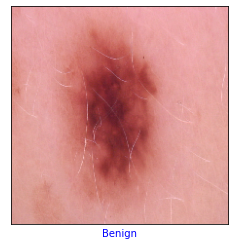

In [126]:
plot_image(400,pred_class[1],list(y_test.values)[1])
